In [2]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd
from jagb_func import custom_hist, simple_gaussian, GLOESS
from matplotlib import gridspec
from astropy.io import fits
from scipy.special import erf
from scipy.optimize import curve_fit
from astropy.wcs import WCS
from scipy import stats


Functions

In [3]:
def asymGaussian(x, A, b, c, d):
    
    """
    Asymmetric Gaussian Function
    
    A: amplitude
    b: epsilon
    c: omega
    d: alpha
    """
    
    term1 = (A / (c * np.sqrt(2 * np.pi)))
    term2 = np.exp((-(x - b) ** 2.0) / (2 *c ** 2.0))
    term3 = (1 + erf((d * (x - b)) / (c * np.sqrt(2))))
    return term1*term2*term3

def variance(omega, alpha):
    return omega**2 *(1-((2*alpha**2)/(np.pi*(1+alpha**2))))

def skew(alpha):
    return ((4-np.pi)/2) *(alpha*np.sqrt(2/np.pi)/np.sqrt(1+alpha**2))**3/(1-2*alpha**2/(np.pi**2 *(1+alpha**2)))**3/2

def average_reddening(table):
    # use wcs of dust map to transform ra/dec of PHAT stars to X/Y
    x_table, y_table = wcs.all_world2pix(table['ra'],table['dec'],1)
    
    # create bin edges
    x = np.linspace(0,694,695)-.5
    y = np.linspace(0,694,695)-.5
    
    ret = stats.binned_statistic_2d(x_table,y_table, None, 'count', bins=[x,y],expand_binnumbers=True)
    return np.mean(data[np.where(ret.statistic !=0 )]*.7394/10**5 *.337 * 0.213) 
                      

### Read in Data

The jupyter notebook that produced the data in the three cells below can be found in the "Correct Photometry for reddening" notebook.

In [4]:
# Tables containing JAGB stars for each region
r1 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/0.fits')
r2 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/1.fits')
r3 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/2.fits')
r4 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/3.fits')
r5 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/4.fits')
r6 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/5.fits')
r7 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/6.fits')
r8 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/7.fits')
r9 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/8.fits')
r10 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/JAGB stars/9.fits')


In [24]:
# Tables containing all stars for each region
t1 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/0.fits')
t2 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/1.fits')
t3 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/2.fits')
t4 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/3.fits')
t5 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/4.fits')
t6 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/5.fits')
t7 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/6.fits')
t8 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/7.fits')
t9 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/8.fits')
t10 = Table.read('/Users/abigaillee/Photometry/M31 PHAT Photometry/Red cor/All/9.fits')


In [6]:
# radial distance for each region
average_rgc = np.array([12.95795052, 13.51536795, 14.04770171, 14.61570022, 15.10052954,
       15.60728245, 16.06683937, 16.6375649 , 17.33343394, 18.34621186])

## Measure JAGB star luminosity function for each region.

Bin size of 0.01 mag and smoothing parameter of 0.10 mag. Later, we investigate the effects of our choice of smoothing parameter. 

In [7]:
# calculate LFs for each region
c1,N1=custom_hist(r1['f110w_vega'], bin_size=.01) # binsize= how many bins
s1= GLOESS(c1,N1,  s=.1)# sig = smoothing parameter

c2,N2=custom_hist(r2['f110w_vega'], bin_size=.01) # binsize= how many bins
s2= GLOESS(c2,N2,  s=.1)# sig = smoothing parameter

c3,N3=custom_hist(r3['f110w_vega'], bin_size=.01) # binsize= how many bins
s3= GLOESS(c3,N3,  s=.1)# sig = smoothing parameter

c4,N4=custom_hist(r4['f110w_vega'], bin_size=.01) # binsize= how many bins
s4= GLOESS(c4,N4,  s=.1)# sig = smoothing parameter

c5,N5=custom_hist(r5['f110w_vega'], bin_size=.01) # binsize= how many bins
s5= GLOESS(c5,N5,  s=.1)# sig = smoothing parameter

c6,N6=custom_hist(r6['f110w_vega'], bin_size=.01) # binsize= how many bins
s6= GLOESS(c6,N6,  s=.1)# sig = smoothing parameter

c7,N7=custom_hist(r7['f110w_vega'], bin_size=.01) # binsize= how many bins
s7= GLOESS(c7,N7,  s=.1)# sig = smoothing parameter

c8,N8=custom_hist(r8['f110w_vega'], bin_size=.01) # binsize= how many bins
s8= GLOESS(c8,N8,  s=.1)# sig = smoothing parameter

c9,N9=custom_hist(r9['f110w_vega'], bin_size=.01) # binsize= how many bins
s9= GLOESS(c9,N9,  s=.1)# sig = smoothing parameter

c10,N10=custom_hist(r10['f110w_vega'], bin_size=.01) # binsize= how many bins
s10= GLOESS(c10,N10,  s=.1)# sig = smoothing parameter


## Make Figure 5 in Paper.

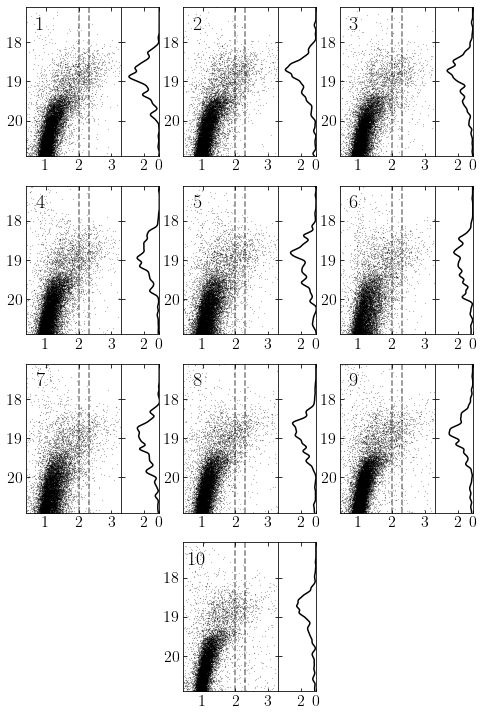

In [8]:
plt.figure(figsize=(8,10))
# set blank "invisible" panel hack
gs = gridspec.GridSpec(4,8, width_ratios=[1,.4,.25,1,.4,.25,1,.4],height_ratios=[1,1,1,1]) 

# region 1
ax0 = plt.subplot(gs[0])
ax0.scatter(t1['f814w_vega']-t1['f110w_vega'],t1['f110w_vega'],s=.01,color='black')
ax0.tick_params(direction='in')
ax0.tick_params(which='minor', direction='in')
ax0.set_xticks([1,2,3])
ax0.xaxis.set_ticks_position('both')
ax0.set_yticks([20,19,18])
ax0.yaxis.set_ticks_position('both')
ax0.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax0.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax0.axvline(2,ls='--',color='black',alpha=.5)
ax0.axvline(2.3,ls='--',color='black',alpha=.5)
ax0.set_xlim(0.4,3.3)
ax0.set_ylim(20.9,17.1)

ax1 = plt.subplot(gs[1],sharey = ax0)
ax1.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax1.tick_params(direction='in')
ax1.tick_params(which='minor', direction='in')
ax1.plot(s1,c1,color='black')
ax1.set_xlim(5,0)
ax1.set_xticks([0, 2])
ax1.xaxis.set_ticks_position('both')
ax1.set_xticklabels(['0','2'], family='serif', fontsize=16)



ax2 = plt.subplot(gs[2])
ax2.set_visible(False)

# region 2
ax3 = plt.subplot(gs[3])
ax3.scatter(t2['f814w_vega']-t2['f110w_vega'],t2['f110w_vega'],s=.01,color='black')
ax3.tick_params(direction='in')
ax3.tick_params(which='minor', direction='in')
ax3.set_xticks([1,2,3])
ax3.xaxis.set_ticks_position('both')
ax3.set_yticks([20,19,18])
ax3.yaxis.set_ticks_position('both')
ax3.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax3.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax3.axvline(2,ls='--',color='black',alpha=.5)
ax3.axvline(2.3,ls='--',color='black',alpha=.5)
ax3.set_xlim(0.4,3.3)
ax3.set_ylim(20.9,17.1)

ax4 = plt.subplot(gs[4],sharey = ax3)
ax4.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax4.tick_params(direction='in')
ax4.tick_params(which='minor', direction='in')
ax4.plot(s2,c2,color='black')
ax4.set_xlim(5,0)
ax4.set_xticks([0, 2])
ax4.xaxis.set_ticks_position('both')
ax4.set_xticklabels(['0','2'], family='serif', fontsize=16)


ax5 = plt.subplot(gs[5])
ax5.set_visible(False)

# region 3
ax6 = plt.subplot(gs[6])
ax6.scatter(t3['f814w_vega']-t3['f110w_vega'],t3['f110w_vega'],s=.01,color='black')
ax6.tick_params(direction='in')
ax6.tick_params(which='minor', direction='in')
ax6.set_xticks([1,2,3])
ax6.xaxis.set_ticks_position('both')
ax6.set_yticks([20,19,18])
ax6.yaxis.set_ticks_position('both')
ax6.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax6.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax6.axvline(2,ls='--',color='black',alpha=.5)
ax6.axvline(2.3,ls='--',color='black',alpha=.5)
ax6.set_xlim(0.4,3.3)
ax6.set_ylim(20.9,17.1)


ax7 = plt.subplot(gs[7],sharey = ax6)
ax7.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax7.tick_params(direction='in')
ax7.tick_params(which='minor', direction='in')
ax7.plot(s3,c3,color='black')
ax7.set_xlim(5,0)
ax7.set_xticks([0, 2])
ax7.xaxis.set_ticks_position('both')
ax7.set_xticklabels(['0','2'], family='serif', fontsize=16)



# # region 4
ax8 = plt.subplot(gs[8])
ax8.scatter(t4['f814w_vega']-t4['f110w_vega'],t4['f110w_vega'],s=.01,color='black')
ax8.tick_params(direction='in')
ax8.tick_params(which='minor', direction='in')
ax8.set_xticks([1,2,3])
ax8.xaxis.set_ticks_position('both')
ax8.set_yticks([20,19,18])
ax8.yaxis.set_ticks_position('both')
ax8.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax8.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax8.axvline(2,ls='--',color='black',alpha=.5)
ax8.axvline(2.3,ls='--',color='black',alpha=.5)
ax8.set_xlim(0.4,3.3)
ax8.set_ylim(20.9,17.1)

ax9 = plt.subplot(gs[9],sharey = ax8)
ax9.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax9.tick_params(direction='in')
ax9.tick_params(which='minor', direction='in')
ax9.plot(s4,c4,color='black')
ax9.set_xlim(5,0)
ax9.set_xticks([0, 2])
ax9.xaxis.set_ticks_position('both')
ax9.set_xticklabels(['0','2'], family='serif', fontsize=16)


ax10 = plt.subplot(gs[10])
ax10.set_visible(False)


# region 5
ax11 = plt.subplot(gs[11])
ax11.scatter(t5['f814w_vega']-t5['f110w_vega'],t5['f110w_vega'],s=.01,color='black')
ax11.tick_params(direction='in')
ax11.tick_params(which='minor', direction='in')
ax11.set_xticks([1,2,3])
ax11.xaxis.set_ticks_position('both')
ax11.set_yticks([20,19,18])
ax11.yaxis.set_ticks_position('both')
ax11.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax11.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax11.axvline(2,ls='--',color='black',alpha=.5)
ax11.axvline(2.3,ls='--',color='black',alpha=.5)
ax11.set_xlim(0.4,3.3)
ax11.set_ylim(20.9,17.1)

ax12 = plt.subplot(gs[12],sharey=ax11)
ax12.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax12.tick_params(direction='in')
ax12.tick_params(which='minor', direction='in')
ax12.plot(s5,c5,color='black')
ax12.set_xlim(5,0)
ax12.set_xticks([0, 2])
ax12.xaxis.set_ticks_position('both')
ax12.set_xticklabels(['0','2'], family='serif', fontsize=16)

ax13 = plt.subplot(gs[13])
ax13.set_visible(False)

# # region 6
ax14= plt.subplot(gs[14])
ax14.scatter(t6['f814w_vega']-t6['f110w_vega'],t6['f110w_vega'],s=.01,color='black')
ax14.tick_params(direction='in')
ax14.tick_params(which='minor', direction='in')
ax14.set_xticks([1,2,3])
ax14.xaxis.set_ticks_position('both')
ax14.set_yticks([20,19,18])
ax14.yaxis.set_ticks_position('both')
ax14.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax14.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax14.axvline(2,ls='--',color='black',alpha=.5)
ax14.axvline(2.3,ls='--',color='black',alpha=.5)
ax14.set_xlim(0.4,3.3)
ax14.set_ylim(20.9,17.1)

ax15 = plt.subplot(gs[15],sharey = ax14)
ax15.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax15.tick_params(direction='in')
ax15.tick_params(which='minor', direction='in')
ax15.plot(s6,c6,color='black')
ax15.set_xlim(5,0)
ax15.set_xticks([0, 2])
ax15.xaxis.set_ticks_position('both')
ax15.set_xticklabels(['0','2'], family='serif', fontsize=16)


# # region 7
ax16= plt.subplot(gs[16])
ax16.scatter(t7['f814w_vega']-t7['f110w_vega'],t7['f110w_vega'],s=.01,color='black')
ax16.tick_params(direction='in')
ax16.tick_params(which='minor', direction='in')
ax16.set_xticks([1,2,3])
ax16.xaxis.set_ticks_position('both')
ax16.set_yticks([20,19,18])
ax16.yaxis.set_ticks_position('both')
ax16.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax16.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax16.axvline(2,ls='--',color='black',alpha=.5)
ax16.axvline(2.3,ls='--',color='black',alpha=.5)
ax16.set_xlim(0.4,3.3)
ax16.set_ylim(20.9,17.1)

ax17 = plt.subplot(gs[17],sharey = ax16)
ax17.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax17.tick_params(direction='in')
ax17.tick_params(which='minor', direction='in')
ax17.plot(s7,c7,color='black')
ax17.set_xlim(5,0)
ax17.set_xticks([0, 2])
ax17.xaxis.set_ticks_position('both')
ax17.set_xticklabels(['0','2'], family='serif', fontsize=16)


ax18 = plt.subplot(gs[18])
ax18.set_visible(False)

# # region 8
ax19 = plt.subplot(gs[19])
ax19.scatter(t8['f814w_vega']-t8['f110w_vega'],t8['f110w_vega'],s=.01,color='black')
ax19.tick_params(direction='in')
ax19.tick_params(which='minor', direction='in')
ax19.set_xticks([1,2,3])
ax19.xaxis.set_ticks_position('both')
ax19.set_yticks([20,19,18])
ax19.yaxis.set_ticks_position('both')
ax19.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax19.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax19.axvline(2,ls='--',color='black',alpha=.5)
ax19.axvline(2.3,ls='--',color='black',alpha=.5)
ax19.set_xlim(0.4,3.3)
ax19.set_ylim(20.9,17.1)

ax20 = plt.subplot(gs[20],sharey = ax19)
ax20.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax20.tick_params(direction='in')
ax20.tick_params(which='minor', direction='in')
ax20.plot(s8,c8,color='black')
ax20.set_xlim(5,0)
ax20.set_xticks([0, 2])
ax20.xaxis.set_ticks_position('both')
ax20.set_xticklabels(['0','2'], family='serif', fontsize=16)


ax21 = plt.subplot(gs[21])
ax21.set_visible(False)



# # region 9
ax22= plt.subplot(gs[22])
ax22.scatter(t9['f814w_vega']-t9['f110w_vega'],t9['f110w_vega'],s=.01,color='black')
ax22.tick_params(direction='in')
ax20.tick_params(which='minor', direction='in')
ax22.set_xticks([1,2,3])
ax22.xaxis.set_ticks_position('both')
ax22.set_yticks([20,19,18])
ax22.yaxis.set_ticks_position('both')
ax22.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax22.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax22.axvline(2,ls='--',color='black',alpha=.5)
ax22.axvline(2.3,ls='--',color='black',alpha=.5)
ax22.set_xlim(0.4,3.3)
ax22.set_ylim(20.9,17.1)

ax23 = plt.subplot(gs[23],sharey = ax22)
ax23.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax23.tick_params(direction='in')
ax23.tick_params(which='minor', direction='in')
ax23.plot(s9,c9,color='black')
ax23.set_xlim(5,0)
ax23.set_xticks([0, 2])
ax23.xaxis.set_ticks_position('both')
ax23.set_xticklabels(['0','2'], family='serif', fontsize=16)


# blank plot
ax24 = plt.subplot(gs[24])
ax25 = plt.subplot(gs[25])
ax26 = plt.subplot(gs[26])
ax24.set_visible(False)
ax25.set_visible(False)
ax26.set_visible(False)

# # # region 10
ax27 = plt.subplot(gs[27])
ax27.scatter(t10['f814w_vega']-t10['f110w_vega'],t10['f110w_vega'],s=.01,color='black')
ax27.tick_params(direction='in')
ax27.tick_params(which='minor', direction='in')
ax27.set_xticks([1,2,3])
ax27.xaxis.set_ticks_position('both')
ax27.set_yticks([20,19,18])
ax27.yaxis.set_ticks_position('both')
ax27.set_xticklabels(['1','2','3'], family='serif', fontsize=16)
ax27.set_yticklabels(['20','19','18'], family='serif', fontsize=16)
ax27.axvline(2,ls='--',color='black',alpha=.5)
ax27.axvline(2.3,ls='--',color='black',alpha=.5)
ax27.set_xlim(0.4,3.3)
ax27.set_ylim(20.9,17.1)

ax28 = plt.subplot(gs[28],sharey = ax27)
ax28.tick_params(
    axis='y',          
    which='both',      
    labelleft=False)
ax28.tick_params(direction='in')
ax28.tick_params(which='minor', direction='in')
ax28.plot(s10,c10,color='black')
ax28.set_xlim(5,0)
ax28.set_xticks([0, 2])
ax28.xaxis.set_ticks_position('both')
ax28.set_xticklabels(['0','2'], family='serif', fontsize=16)

ax29 = plt.subplot(gs[29])
ax29.set_visible(False)


plt.subplots_adjust(wspace=0)
plt.subplots_adjust(top=1,bottom=0.05)

ax0.text(0.15,.85,'1',fontsize=20, horizontalalignment='center',transform=ax0.transAxes)
ax3.text(0.15,.85,'2',fontsize=20, horizontalalignment='center',transform=ax3.transAxes)
ax6.text(0.15,.85,'3',fontsize=20, horizontalalignment='center',transform=ax6.transAxes)
ax8.text(0.15,.85,'4',fontsize=20, horizontalalignment='center',transform=ax8.transAxes)
ax11.text(0.15,.85,'5',fontsize=20, horizontalalignment='center',transform=ax11.transAxes)
ax14.text(0.15,.85,'6',fontsize=20, horizontalalignment='center',transform=ax14.transAxes)
ax16.text(0.15,.85,'7',fontsize=20, horizontalalignment='center',transform=ax16.transAxes)
ax19.text(0.15,.85,'8',fontsize=20, horizontalalignment='center',transform=ax19.transAxes)
ax22.text(0.15,.85,'9',fontsize=20, horizontalalignment='center',transform=ax22.transAxes)
ax27.text(0.15,.85,'10',fontsize=20, horizontalalignment='center',transform=ax27.transAxes)

plt.savefig('/Users/abigaillee/Documents/Research/M31 figures/cmds.png',dpi=300)

# Find skew and mode of each region's JAGB star LF

In [9]:
mu1=c1[np.where(np.max(s1)==s1)]
mu2=c2[np.where(np.max(s2)==s2)]
mu3=c3[np.where(np.max(s3)==s3)]
mu4=c4[np.where(np.max(s4)==s4)]
mu5=c5[np.where(np.max(s5)==s5)]
mu6=c6[np.where(np.max(s6)==s6)]
mu7=c7[np.where(np.max(s7)==s7)]
mu8=c8[np.where(np.max(s8)==s8)]
mu9=c9[np.where(np.max(s9)==s9)]
mu10=c10[np.where(np.max(s10)==s10)]

mu_list =np.array([mu1, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10]).flatten()

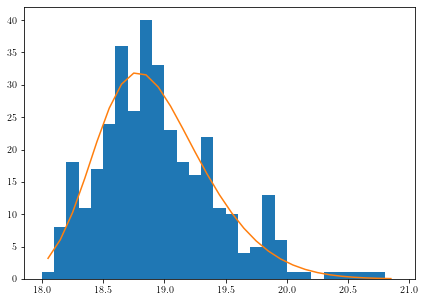

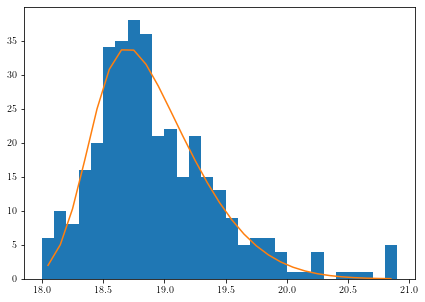

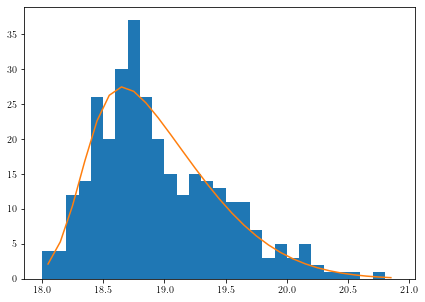

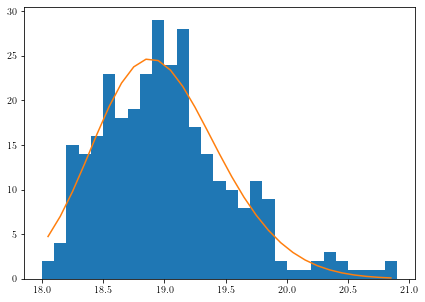

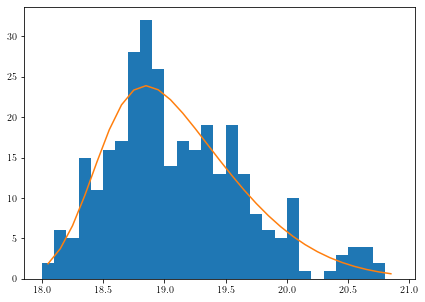

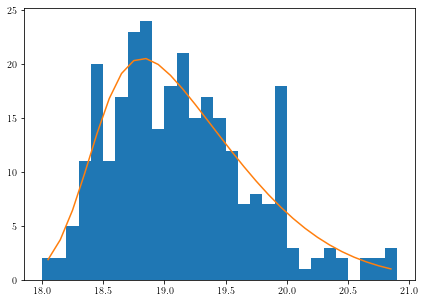

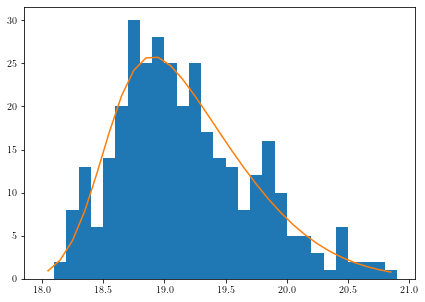

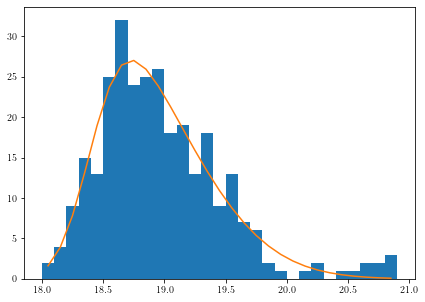

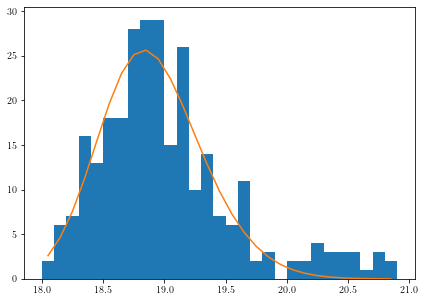

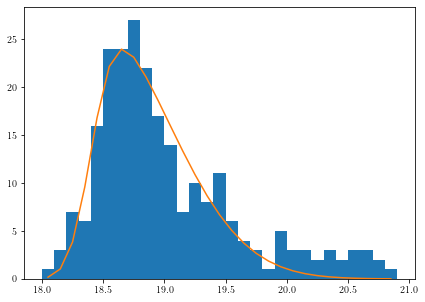

In [10]:
# fit for each region for skew and variance
list_regions = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10]
omega_list = []
alpha_list =[]
for i in range(10):
    plt.figure(figsize=(7,5))
    bin_heights, bin_borders, _  = plt.hist(list_regions[i]['f110w_vega'],bins=np.arange(18,21,.1))
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    popt, pcov=curve_fit(asymGaussian, bin_centers, bin_heights,p0=[35,18.5,1,1],
                        bounds=([],[]))
    plt.plot(bin_centers, asymGaussian(bin_centers, *popt))
    omega_list.append(popt[2])
    alpha_list.append(popt[3])

In [11]:
# calculate variance
print(variance(np.array(omega_list), np.array(alpha_list)))

# calculate skew
print(skew(np.array(alpha_list)))

# calculate standard error from variance
errors=[]
for i in range(10): 
    errors.append(np.sqrt(variance(np.array(omega_list), np.array(alpha_list)))[i]/np.sqrt(len(list_regions[i])))

[0.20470065 0.18462573 0.24704455 0.26770427 0.31981477 0.38484493
 0.31094536 0.21292939 0.1787134  0.15473148]
[0.14485802 0.17275986 0.18847588 0.09506951 0.17519862 0.18507179
 0.1782542  0.17512115 0.10205399 0.19048416]


## Metallicity Analysis

In [12]:
metal = -0.020*np.array(average_rgc) # from Gregersen+15


In [13]:
# see if statistically significant relation exists between R, and mu_list or skew
popt, pcov = np.polyfit(average_rgc, mu_list, deg=1, cov=True)
slope_metal = popt[0]
slope_error = np.sqrt(pcov[0,0])
print(slope_metal, slope_error)


popt, pcov = np.polyfit(average_rgc, skew(np.array(alpha_list)), deg=1, cov=True)
slope_metal_var = popt[0]
slope_error_var = np.sqrt(pcov[0,0])
print(slope_metal_var, slope_error_var)

-0.014154560492348353 0.019810570708519912
0.0013023689466643202 0.007231005380321674


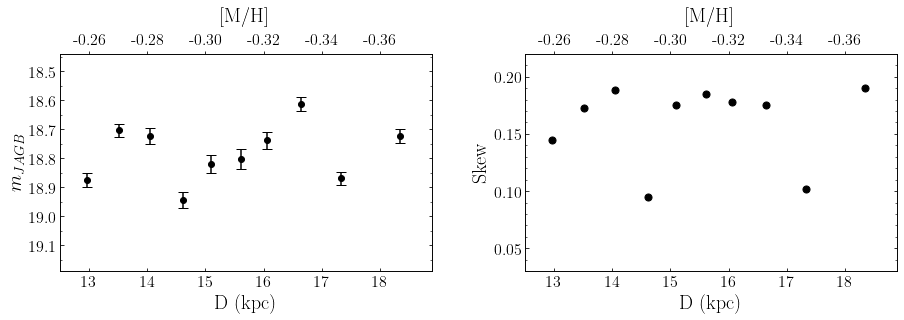

In [14]:
plt.figure(figsize=(15,4))
gs = gridspec.GridSpec(1,2) 



ax0 = plt.subplot(gs[0])
ax0.errorbar(average_rgc, mu_list,yerr=errors,color='black',fmt='o',capsize=5)
ax0.set_xlabel('D (kpc)',fontsize=20)
ax0.set_ylabel('$m_{JAGB}$',fontsize=20)
ax0.tick_params(direction='in')
ax0.tick_params(which='minor', direction='in')
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.set_ylim(19.19, 18.44)
ax0.set_yticks([18.5,18.6,18.7, 18.8, 18.9,19,19.1])
ax0.set_yticklabels(['18.5','18.6','18.7','18.8','18.9','19.0','19.1'], family='serif', fontsize=16)
ax0.set_yticks(np.arange(18.45, 19.2, .05), minor=True) # set minor ticks



ax01 = ax0.twiny()
ax01.set_xlim(12.5*-0.02,18.9*-0.02)
ax01.set_xticks([-.26, -.28, -.3, -.32, -.34, -.36])
ax01.set_xticklabels(['-0.26','-0.28','-0.30','-0.32','-0.34','-0.36'], family='serif', fontsize=16)
ax01.set_xlabel('[M/H]',fontsize=20)
ax01.xaxis.set_label_coords(0.5,1.15)

ax0.set_xlim(12.5,18.9)
ax0.set_xticks([13,14,15,16,17,18])
ax0.set_xticklabels(['13','14','15','16','17','18'], family='serif', fontsize=16)


ax1 = plt.subplot(gs[1])
ax1.scatter(average_rgc, skew(np.array(alpha_list)), color='black',s=50)
ax1.set_xlim(12.5,18.9)
ax1.set_xticks([13,14,15,16,17,18])
ax1.set_xticklabels(['13','14','15','16','17','18'], family='serif', fontsize=16)

ax1.set_ylabel('Skew',fontsize=20)
ax1.set_xlabel('D (kpc)',fontsize=20)
ax1.tick_params(direction='in')
ax1.tick_params(which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')

ax1.set_ylim(0.03,0.22)
ax1.set_yticks([.05,.1,.15,.2,])
ax1.set_yticklabels(['0.05','0.10','0.15','0.20'], family='serif', fontsize=16)
ax1.set_yticks(np.arange(0.03,0.22,.01), minor=True) # set minor ticks
ax11 = ax1.twiny()
ax11.set_xlim(12.5*-0.02,18.9*-0.02)
ax11.set_xticks([-.26, -.28, -.3, -.32, -.34, -.36])
ax11.set_xticklabels(['-0.26','-0.28','-0.30','-0.32','-0.34','-0.36'], family='serif', fontsize=16)
ax11.set_xlabel('[M/H]',fontsize=20)
ax11.xaxis.set_label_coords(0.5,1.15)


plt.subplots_adjust(wspace=0.25)
plt.savefig('/Users/abigaillee/Documents/Research/M31 figures/metal_cor.png',dpi=300,bbox_inches='tight')

## Reddening Analysis

In [15]:
imagename = '/Users/abigaillee/Photometry/M31 PHAT Photometry/Draine Maps/M31_M160_111_SSS_111_Model_All_SurfBr_Mdust.fits'

image_data = fits.getdata(imagename, ext=0)
hdu = fits.open(imagename)[0]
wcs = WCS(hdu.header)
data = hdu.data

In [16]:
# find average reddening of JAGB stars in each region
reddening_list=[]
for i in range(10):
    reddening_list.append(average_reddening(list_regions[i]))


In [17]:
popt, pcov = np.polyfit(reddening_list, mu_list, deg=1, cov=True)
slope_age = popt[0]
err_age = np.sqrt(pcov[0,0])
print(slope_age, err_age)


popt, pcov = np.polyfit(reddening_list, skew(np.array(alpha_list)), deg=1, cov=True)
slope_metal_var = popt[0]
slope_error_var = np.sqrt(pcov[0,0])
print(slope_metal_var, slope_error_var)
print(popt)

-0.284703893499739 3.4293054200839985
0.330933902838339 1.210941459619966
[0.3309339  0.14370995]


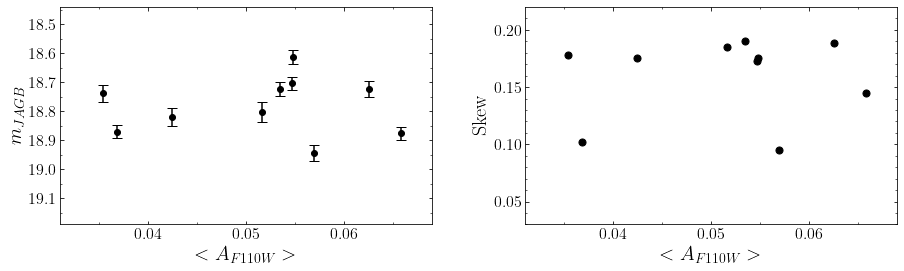

In [19]:
plt.figure(figsize=(15,4))
gs = gridspec.GridSpec(1,2) 



ax0 = plt.subplot(gs[0])
ax0.errorbar(reddening_list, mu_list,yerr=errors,color='black',fmt='o',capsize=5)

ax0.set_xlabel('$<A_{F110W}>$',fontsize=20)
ax0.set_ylabel('$m_{JAGB}$',fontsize=20)
ax0.tick_params(direction='in')
ax0.tick_params(which='minor', direction='in')
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.set_ylim(19.19, 18.44)
ax0.set_yticks([18.5,18.6,18.7, 18.8, 18.9,19,19.1])
ax0.set_yticklabels(['18.5','18.6','18.7','18.8','18.9','19.0','19.1'], family='serif', fontsize=16)
ax0.set_yticks(np.arange(18.45, 19.2, .05), minor=True) # set minor ticks

ax0.set_xticks([0.04,0.05,0.06])
ax0.set_xticklabels(['0.04','0.05','0.06'], family='serif', fontsize=16)
ax0.set_xticks(np.arange(0.03,0.07, 0.005), minor=True) # set minor ticks
ax0.set_xlim(0.031,0.069)



ax1 = plt.subplot(gs[1])
ax1.scatter(reddening_list, skew(np.array(alpha_list)), color='black',s=50)

ax1.set_xticks([0.04,0.05,0.06])
ax1.set_xticklabels(['0.04','0.05','0.06'], family='serif', fontsize=16)
ax1.set_xticks(np.arange(0.03,0.07, 0.005), minor=True) # set minor ticks
ax1.set_xlim(0.031,0.069)

ax1.set_ylabel('Skew',fontsize=20)
ax1.set_xlabel('$<A_{F110W}>$',fontsize=20)
ax1.tick_params(direction='in')
ax1.tick_params(which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')

ax1.set_ylim(0.03,0.22)
ax1.set_yticks([.05,.1,.15,.2,])
ax1.set_yticklabels(['0.05','0.10','0.15','0.20'], family='serif', fontsize=16)
ax1.set_yticks(np.arange(0.03,0.22,.01), minor=True) # set minor ticks


plt.subplots_adjust(wspace=0.25)
plt.savefig('/Users/abigaillee/Documents/Research/M31 figures/red_cor.png',dpi=300,bbox_inches='tight')

## Star formation history analysis

In [20]:
def measure_mean_AGB(table):
    """
    Measures the mean F110W magnitude of the bright AGB stars.
    """
    agb = table[(table['f110w_vega']<18.3)&((table['f814w_vega']-table['f110w_vega'])>1.2)]

    mu = np.mean(agb['f110w_vega'])
    scatter = np.sqrt(np.sum((agb['f110w_vega']-mu)**2))/len(agb)
    
    return mu, scatter

In [25]:
# measure the mean magnitude of the bright AGB stars
list_regions_full = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]
meanAGB_list=[]
scatter_list=[]
for i in range(10):
    tmp =  measure_mean_AGB(list_regions_full[i])
    
    meanAGB_list.append(tmp[0])
    scatter_list.append(tmp[1])


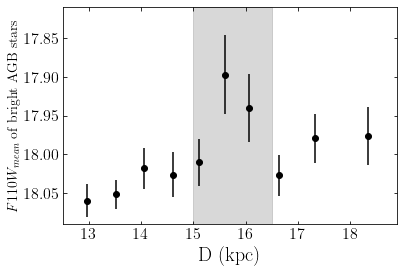

In [26]:
fig, ax = plt.subplots(figsize=(6,4))


ax.errorbar(average_rgc, meanAGB_list,yerr = scatter_list, fmt='o',color='black')
ax.set_ylabel('$F110W_{mean}$ of bright AGB stars',fontsize=14)
ax.set_xlabel('D (kpc)',fontsize=20)
plt.axvspan(15,16.5,color='grey',alpha=.3)

ax.set_xlim(12.5,18.9)
ax.set_xticks([13,14,15,16,17,18])
ax.set_xticklabels(['13','14','15','16','17','18'], family='serif', fontsize=16)


ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_ylim(18.09, 17.81)
ax.set_yticks([17.85, 17.9, 17.95, 18, 18.05])
ax.set_yticklabels(['17.85','17.90','17.95','18.00','18.05'], family='serif', fontsize=16)

plt.show()


In [27]:
popt, pcov = np.polyfit(meanAGB_list, mu_list, deg=1, cov=True)
slope_age = popt[0]
err_age = np.sqrt(pcov[0,0])
print(slope_age, err_age)


popt, pcov = np.polyfit(meanAGB_list, skew(np.array(alpha_list)), deg=1, cov=True)
slope_metal_var = popt[0]
slope_error_var = np.sqrt(pcov[0,0])
print(slope_metal_var, slope_error_var)

0.02539752295230978 0.691488249818241
-0.17542123783089797 0.2372550558171656


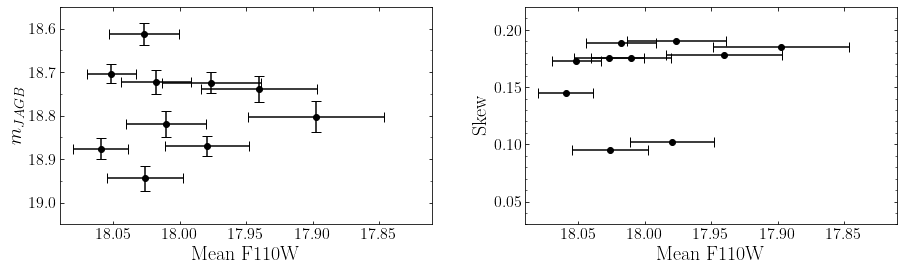

In [29]:
plt.figure(figsize=(15,4))
gs = gridspec.GridSpec(1,2) 



ax0 = plt.subplot(gs[0])
ax0.errorbar( meanAGB_list, mu_list,xerr = scatter_list, yerr=errors,color='black',fmt='o',capsize=5)

ax0.set_xlabel('Mean F110W',fontsize=20)
ax0.set_ylabel('$m_{JAGB}$',fontsize=20)
ax0.tick_params(direction='in')
ax0.tick_params(which='minor', direction='in')
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.set_ylim(19.05, 18.55)
ax0.set_yticks([18.6,18.7, 18.8, 18.9,19])
ax0.set_yticklabels(['18.6','18.7','18.8','18.9','19.0'], family='serif', fontsize=16)
ax0.set_yticks(np.arange(18.55, 19.05, .05), minor=True) # set minor ticks


ax0.set_xlim(18.09, 17.81)
ax0.set_xticks([17.85, 17.9, 17.95, 18, 18.05])
ax0.set_xticklabels(['17.85','17.90','17.95','18.00','18.05'], family='serif', fontsize=16)



ax1 = plt.subplot(gs[1])
ax1.errorbar( meanAGB_list, skew(np.array(alpha_list)),xerr = scatter_list, color='black',fmt='o',capsize=5)
ax1.set_xlim(18.09, 17.81)
ax1.set_xticks([17.85, 17.9, 17.95, 18, 18.05])
ax1.set_xticklabels(['17.85','17.90','17.95','18.00','18.05'], family='serif', fontsize=16)

ax1.set_ylabel('Skew',fontsize=20)
ax1.set_xlabel('Mean F110W',fontsize=20)
ax1.tick_params(direction='in')
ax1.tick_params(which='minor', direction='in')
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')

ax1.set_ylim(0.03,0.22)
ax1.set_yticks([.05,.1,.15,.2,])
ax1.set_yticklabels(['0.05','0.10','0.15','0.20'], family='serif', fontsize=16)
ax1.set_yticks(np.arange(0.03,0.22,.01), minor=True) # set minor ticks


plt.subplots_adjust(wspace=0.25)
plt.savefig('/Users/abigaillee/Documents/Research/M31 figures/age_cor.png',dpi=300,bbox_inches='tight')